<a href="https://colab.research.google.com/github/manuelescola/myprojects/blob/main/02_Building_a_classification_neural_network_using_only_the_NumPy_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

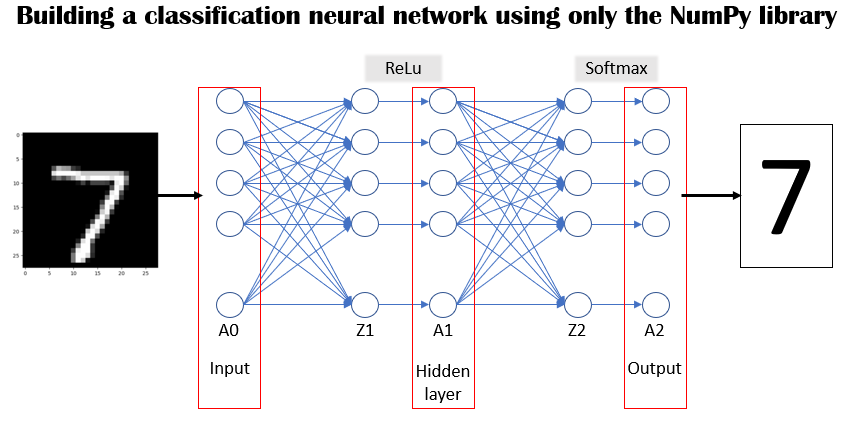

_Note: This notebook has been designed to be run in Google Collab. If run it locally or in other platforms, please make sure the dataset is loaded correctly into the notebook._

# 1. Introduction

Over the last decade, neural networks have acquired an important role in the machine learning field. Today, there are many libraries that help create a network without having to design them from scratch. This makes the process very quick even for those users who do not understand how networks really work.

This notebook, however, goes deeply in a basic neural network and builds it from the grown up, allowing the user to understand how they really work. To do it, we will use the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) (which contains handwritten digits) and the [numpy package](https://numpy.org/).

The neural network we are going to build will have an input layer, a hidden layer and an output layer. The activation function for the hidden layer  will be a [ReLU function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), while for the output we will use a softmax activation function.
<br>

# 2. Setting up the notebook

In [2]:
import numpy as np
import pandas as pd                   # this library is used only to import the data
import urllib.request                 # this library is used only to import the data
import gzip                           # this library is used only to import the data
from matplotlib import pyplot as plt  # this library is used to visualise the digits

# 3. Theory and equations to compute

## 3.1. Forward propagation

Forward propagation consists of taking an image, run it through the network and compute the output. We will compute it by using the following equations.

$$Z^{[1]} = W^{[1]} X + B^{[1]}$$
$$A^{[1]} = ReLU(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]} + B^{[2]}$$
$$A^{[2]} = softmax(Z^{[2]})$$

The forward propagation process is as follows:
- The first layer, `A0`, has 784 neurons (one for each pixel of the image), and it is composed by `m` number of instances. We multiply this layer by a vector capturing the weights, `w1`, and sum a biase `b1`. The result is vector `z1`. 

- We pass `z1` to a `ReLU` activation function, obtaining the hidden layer `A1`. 

- The hidden layer, `A1`, is then multiplied again by a new set of weights `w2` in order to obtain a vector `z2`.

- Finally, `z2` is introduced in a `softmax` activation function to obtain the output `A2`, which is the prediction of the network.

## 3.2. Backward propagation

The second part consists of calculating the loss of the value predicted by comparing it with the real value and update the weights to make better predictions each time. We will need the following equations.

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} * dZ^{[2]} .* DerReLU(z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

The previous equations are used to calculate how much each weight or biase contributes to the loss. 

Now we have to compute the gradient descent algorithm, which uses a hyperparameter called `learning rate`. 

$$W^{[2]} = W^{[2]} - \alpha *dW^{[2]}$$
$$B^{[2]} = B^{[2]} - \alpha *dB^{[2]}$$
$$W^{[1]} = W^{[1]} - \alpha *dW^{[1]}$$
$$B^{[1]} = B^{[1]} - \alpha *dB^{[1]}$$

Once we have the new values for the parameters, we repeat the process again. The parameters will be updated until the loss is small enough (gradients close to cero) or we have conducted a certain number of steps with the gradient descent.

# 4. Importing dataset

In [3]:
# Download the MNIST dataset
urllib.request.urlretrieve("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", "train-images.gz")
urllib.request.urlretrieve("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", "train-labels.gz")
urllib.request.urlretrieve("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", "test-images.gz")
urllib.request.urlretrieve("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz", "test-labels.gz")

# Load the MNIST dataset into NumPy arrays
with gzip.open('train-images.gz', 'rb') as f:
    train_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open('train-labels.gz', 'rb') as f:
    train_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
with gzip.open('test-images.gz', 'rb') as f:
    test_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open('test-labels.gz', 'rb') as f:
    test_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

# Joining predictors and labels in just one dataset to do everything from scratch
data_train_original = np.hstack((train_labels.reshape(-1,1), train_images.reshape(len(train_images), -1)))
data_test_original = np.hstack((test_labels.reshape(-1,1), test_images.reshape(len(test_images), -1)))

In [4]:
print(data_train_original.shape)
print(data_test_original.shape)

(60000, 785)
(10000, 785)


In [5]:
# Taking the dimensions of the array and shuffling the training set to train the model properly
m, n = data_train_original.shape
np.random.shuffle(data_train_original)

# Create the training set (from data_train_original)
data_train = data_train_original[10000:m].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
print(f'The training set has {X_train.shape[0]} features {X_train.shape[1]} observations')

# Create the evaluation set (from data_train_original)
data_dev = data_train_original[0:10000].T
y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255
print(f'The evaluation set has {X_dev.shape[0]} features {X_dev.shape[1]} observations')

# Create the test set (from data_test_original)
data_test = data_test_original.T
y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255
print(f'The test set has {X_test.shape[0]} features {X_test.shape[1]} observations')

The training set has 784 features 50000 observations
The evaluation set has 784 features 10000 observations
The test set has 784 features 10000 observations


# 5. Coding the training algorithm: gradient descent with early stopping

Before training the network, we need some values from which we start the gradient descent. Note that we add -0.5 after initialising the weights. Adding -0.5 to the random initialization of the weight matrices and bias vectors in init_params() is a common technique to initialize the parameters with values close to zero. Initializing the parameters with small random values close to zero helps to prevent the neurons from saturating, which can occur if the weights are too large or too small. When the neurons saturate, they become less responsive to changes in the input, and the learning process slows down or even stops.

By initializing the parameters with random values close to zero, we can avoid the saturation problem and ensure that the neurons have a good initial range of responses to the input. This can help to speed up the learning process and improve the performance of the model. The value -0.5 is often used to shift the random initialization to a range of values centered around zero.

In [6]:
 def init_params():
   W1 = np.random.rand(10,784) - 0.5    
   B1 = np.random.rand(10,1) - 0.5    
   W2 = np.random.rand(10,10) - 0.5     
   B2 = np.random.rand(10,1) - 0.5     
   return W1, B1, W2, B2

In order to train a neural network, we need to define the functions that compute the forward and backward propagation. The forward propagation takes the input data and propagates it through the network to generate an output. This output is then compared to the actual output to compute a loss function. The backward propagation computes the gradient of the loss function with respect to the network parameters (in this case, W1, B1, W2, B2), which is then used to update the network parameters. To update the parameters we also create gradient descent function.

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def derivative_ReLU(Z):
  return Z > 0

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backprop(Y, A2, Z2, W2, A1, Z1, W1, X):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y                          
  dW2 = 1/m * dZ2.dot(A1.T)
  dB2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  dB1 = 1/m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
  W1 = W1 - alpha * dW1
  B1 = B1 - alpha * dB1
  W2 = W2 - alpha * dW2
  B2 = B2 - alpha * dB2
  return W1, B1, W2, B2

def convert_predict(A2):
  return np.argmax(A2,0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

The following function is used to train the network with gradient descent using early stopping to avoid overfitting. It also plots the accuracy of the predictions for each epoch.

In [11]:
def gradient_descent(X, Y, X_dev, y_dev, iterations=10000, alpha=0.1, patience=200):
  W1, B1, W2, B2 = init_params()
  best_accuracy = 0.0
  best_weights = (W1, B1, W2, B2)
  count = 0

  lst_accuracy_training = []
  lst_accuracy_dev = []

  for i in range(1, iterations+1):
    Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backprop(Y, A2, Z2, W2, A1, Z1, W1, X)
    W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
    
    accuracy_training = get_accuracy(convert_predict(forward_prop(W1, B1, W2, B2, X_train)[-1]), y_train)
    accuracy_dev = get_accuracy(convert_predict(forward_prop(W1, B1, W2, B2, X_dev)[-1]), y_dev)
    lst_accuracy_training.append(accuracy_training)
    lst_accuracy_dev.append(accuracy_dev)
    
    if (i == 1) or (i % 50 == 0):
      print(f'Accuracy epoch {i}. Training set: {accuracy_training}. Evaluation set: {accuracy_dev}')
    
    if accuracy_dev > best_accuracy:
      best_accuracy = accuracy_dev
      best_weights = (W1, B1, W2, B2)
      count = 0
    else:
      count += 1
      if count >= patience:
        print(f'Early stopping at iteration {i}, best accuracy: {best_accuracy}')
        return best_weights[0], best_weights[1], best_weights[2], best_weights[3], lst_accuracy_training, lst_accuracy_dev      
      
  return best_weights[0], best_weights[1], best_weights[2], best_weights[3], lst_accuracy_training, lst_accuracy_dev

# 6. Training the model

Now we have everything we need to train the model. We select the training and the evaluation set (for the early stopping). We also input the number of `iterations`, the `learning rate` and the `patience` before the early stopping is activated. The `patience` tells the algorithm how many epochs have to pass wihtout an improvement in the evaluation set accuracy before we stop the training.

In [12]:
W1, B1, W2, B2, accuracy_train, accuracy_dev = gradient_descent(X_train, y_train, X_dev, y_dev, 10000, 0.8, 50)

Accuracy epoch 1. Training set: 0.15786. Evaluation set: 0.155
Accuracy epoch 50. Training set: 0.72092. Evaluation set: 0.7197
Accuracy epoch 100. Training set: 0.822. Evaluation set: 0.8275
Accuracy epoch 150. Training set: 0.86382. Evaluation set: 0.8661
Accuracy epoch 200. Training set: 0.87364. Evaluation set: 0.8769
Accuracy epoch 250. Training set: 0.8954. Evaluation set: 0.9003
Accuracy epoch 300. Training set: 0.89964. Evaluation set: 0.9024
Accuracy epoch 350. Training set: 0.90522. Evaluation set: 0.908
Accuracy epoch 400. Training set: 0.90766. Evaluation set: 0.9117
Accuracy epoch 450. Training set: 0.91084. Evaluation set: 0.9134
Accuracy epoch 500. Training set: 0.91296. Evaluation set: 0.9147
Accuracy epoch 550. Training set: 0.91638. Evaluation set: 0.9182
Accuracy epoch 600. Training set: 0.9191. Evaluation set: 0.9189
Accuracy epoch 650. Training set: 0.8798. Evaluation set: 0.8815
Accuracy epoch 700. Training set: 0.92354. Evaluation set: 0.9223
Accuracy epoch 750. 

We can plot the evolution of the accuracies to see if the early stopping has worked.

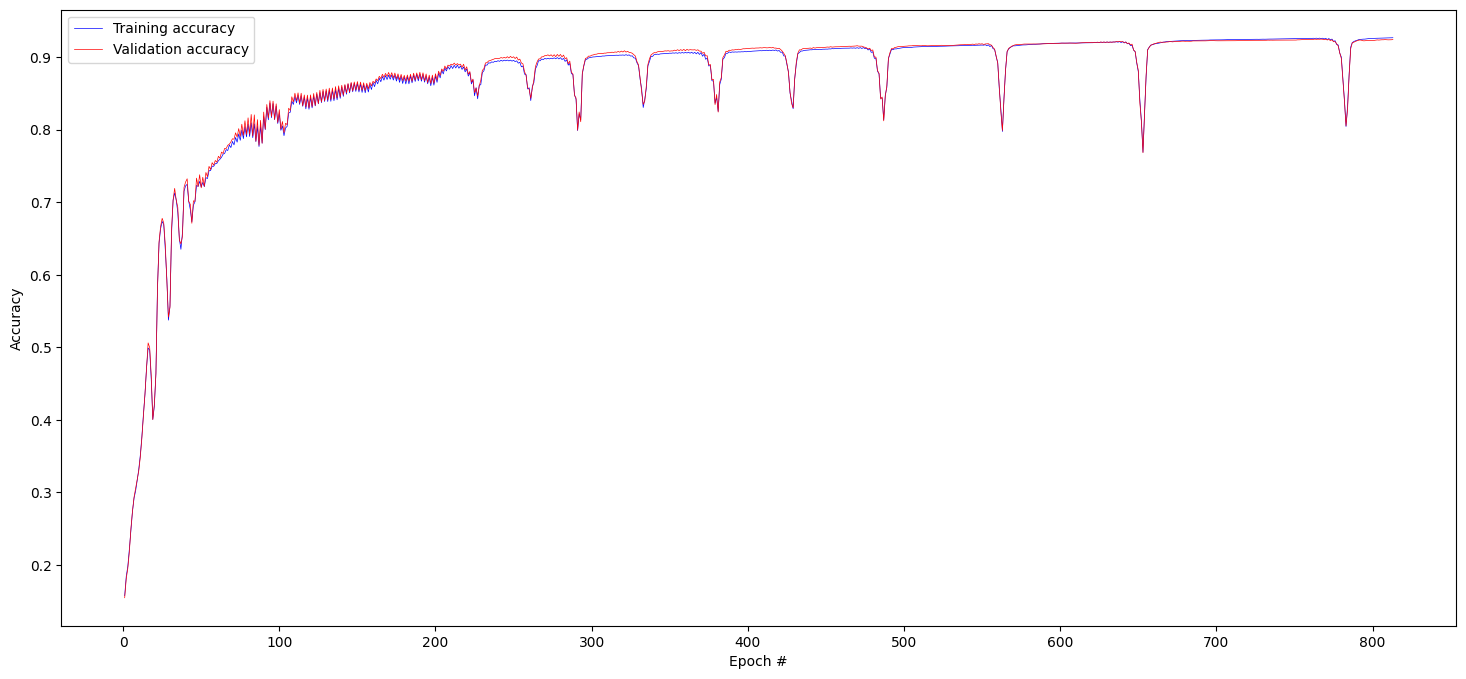

In [19]:
# Plot the training and validation accuracies
fig, ax = plt.subplots(figsize=(18, 8))

x = list(range(1, 1+len(accuracy_train)))
ax.plot(x, accuracy_train, 'b', linewidth=0.5)
ax.plot(x, accuracy_dev, 'r', linewidth=0.5)
ax.set_xlabel('Epoch #')
ax.set_ylabel('Accuracy')
ax.legend(('Training accuracy', 'Validation accuracy'))

plt.show()


# 7. Testing the model

Now we have a movel with the correct weights. The following functions are used to make predictions on any dataset with the weights found.

In [20]:
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = convert_predict(A2)
    return predictions

def predict(X_data, y_data, index, W1, B1, W2, B2):
    current_image = X_data[:, index, None]
    prediction = make_predictions(X_data[:, index, None], W1, B1, W2, B2)
    label = y_data[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

We can finally visually check that the model performs as expected.

Prediction:  [7]
Label:  7


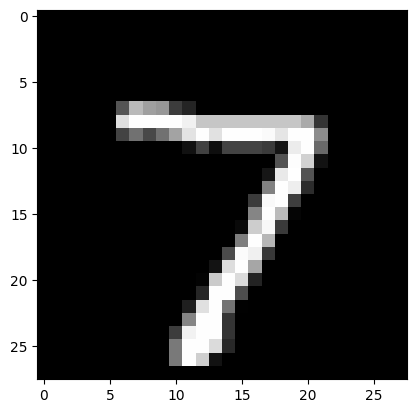

Prediction:  [9]
Label:  9


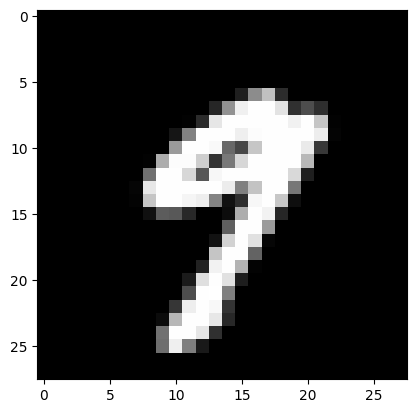

Prediction:  [3]
Label:  3


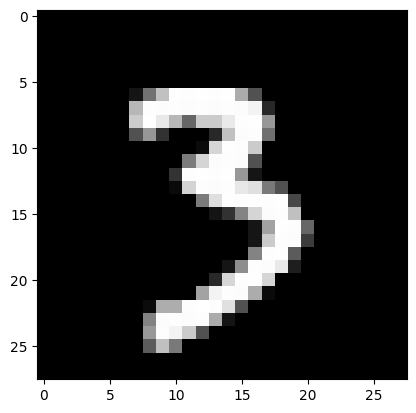

Prediction:  [6]
Label:  6


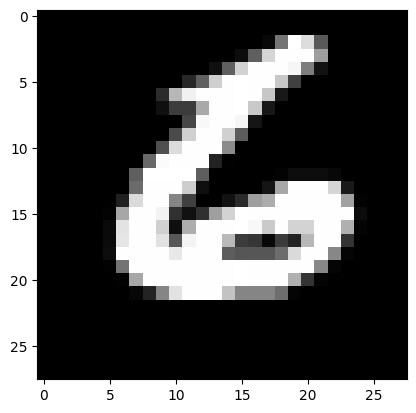

In [21]:
predict(X_test, y_test, 0, W1, B1, W2, B2)
predict(X_test, y_test, 20, W1, B1, W2, B2)
predict(X_test, y_test, 30, W1, B1, W2, B2)
predict(X_test, y_test, 9999, W1, B1, W2, B2)

# 8. References

The present notebook has been inspired by Samson Zhang. A similar process to the one showed here can be found at https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook.